<a href="https://colab.research.google.com/github/JyotiSingh0996/Data-Science-Projects-by-jyoti-singh/blob/main/Taiyo_ai_Assignment_Colab_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Objective - Predict Domestic Market

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dfset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dfset_first_look
df = pd.read_csv('/content/drive/MyDrive/Random Price Dataset Trial Assignment (1).csv',index_col='Date',parse_dates=True)
df.head()

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
2000-01-02,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2000-01-03,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
2000-01-04,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
2000-01-05,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


In [ ]:
# dfset Rows & Columns count
df.shape

(276, 49)

In [ ]:
# dfset info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2000-01-01 to 2022-01-12
Data columns (total 49 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Domestic Market (Contract) Blow Molding, Low                                                                                276 non-null    int64  
 1   Spot/Export Blow Molding                                                                                                    185 non-null    float64
 2   Spot, Domestic                                                                                                              125 non-null    float64
 3   WTISPLC                                                                                                   

In [ ]:
# count Duplicate values
df.duplicated().sum()

0

In [ ]:
# check null values
df.isnull().sum()

Domestic Market (Contract) Blow Molding, Low                                                                                    0
Spot/Export Blow Molding                                                                                                       91
Spot, Domestic                                                                                                                151
WTISPLC                                                                                                                         0
MCOILBRENTEU                                                                                                                    0
GASREGM                                                                                                                         0
IMPCH                                                                                                                           1
EXPCH                                                                                     

# Understand the datast

In [ ]:
# WTISPLC - West Texas Intermediate Spot Crude Oil price (West Texas Intermediate (WTI) is a grade or mix of crude oil)
# MCOILBRENTEU - Crude Oil Price of Brent Crude (oil market based around the North Sea of Northwest Europe)
# GASREGM - US Regular all formation Gas Price
# IMPCH -  U.S. Imports of Goods by Customs Basis from China
# EXPCH - U.S. Exports of Goods by F.A.S. Basis to Mainland China (EXPCH)
# PRUBBUSDM - Global Price of Rubber
# WPUFD4111 - Producer Price Index by Commodity: Final Demand: Finished Consumer Foods 
# PCU325211325211 - Producer Price Index by Industry: Plastics Material and Resin Manufacturing
# PCU32611332611301 -  Producer Price Index by Industry: Nonpackaging Plastics Film and Sheet 
# WPU0915021625 - Producer Price Index by Commodity: Pulp, Paper, and Allied 
# PCU3252132521 - Producer Price Index by Industry: Resin and Synthetic Rubber Manufacturing
# MHHNGSP - Henry Hub Natural Gas Spot Price
# WPU072205011 - Rubber and Plastic Products: Unlaminated Polyethylene Film and Sheet
# PCU32611132611115 -  Plastics Bag and Pouch Manufacturing: Other Polyethylene Bags, Pouches, and Liners
# PCU32611332611301.1 - Nonpackaging Plastics Film and Sheet Manufacturing: Unlaminated Polyethylene Film and Sheet
# PCU32611132611112 -  Producer Price Index by Industry: Plastics Bag and Pouch Manufacturing: Polyethylene Refuse Bags
# WPU0915021622 -  Pulp, Paper, and Allied Products: Polyethylene Refuse Bags


# dataset Preprocessing

In [ ]:
#replace null values in 0
df.fillna(0,inplace=True)

In [ ]:
# Date columns to Date format conversion
#date_col = pd.DatetimeIndex(df['Date'])
#df['Year'] = date_col.year
#df['Month'] = date_col.month
#df['Day'] = date_col.day

In [ ]:
df.columns

Index(['Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'Un

In [ ]:
# remove commas 
#df = df.replace({',':''}, regex=True)

In [ ]:
# replace str to float
#df = df.astype(float)

In [ ]:
# float to int
#df = df.astype(int)

In [ ]:
df['Paper_products'] = 0.5*df['WPU0915021625'] + 0.5*df['WPU0915021622']
df['Plastics_bags'] = 0.5*df['PCU32611132611115']+0.5*df['PCU32611132611112']
df['Non_packing_plastics'] = 0.5*df['PCU32611332611301'] + 0.5*df['PCU32611332611301.1']
df['Spot_market'] = 0.6*df['Spot/Export Blow Molding']+0.4*df['Spot, Domestic']
df['Rubber_products'] = df['PRUBBUSDM']+df['WPU072205011']+df['PCU3252132521']+df['PCU325211325211']
df['Crude_oil'] = 0.5*df['WTISPLC'] + 0.5*df['MCOILBRENTEU']


In [ ]:
# remove unncessary columns or null column
df.drop(columns=['WPU0915021625','WPU0915021622','PCU32611132611115','PCU32611132611112','PCU32611332611301','PCU32611332611301','Spot/Export Blow Molding','Spot, Domestic','PRUBBUSDM','WPU072205011','PCU3252132521','PCU325211325211','WTISPLC','MCOILBRENTEU','South_korea_import'],inplace=True)

In [ ]:
df['Natural_gas'] = df['GASREGM']+df['MHHNGSP']

In [ ]:
df.drop(columns=['GASREGM','MHHNGSP'],inplace=True)

In [ ]:
df.drop(columns=['PCU32611332611301.1'],inplace=True)

In [ ]:
df.head()

,"Domestic Market (Contract) Blow Molding, Low",IMPCH,EXPCH,WPUFD4111,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,...,United Kingdome_import,China_import,Japan_import,Paper_products,Plastics_bags,Non_packing_plastics,Spot_market,Rubber_products,Crude_oil,Natural_gas
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,41,6902.1,863.1,135.0,139.4,0,0,0,0,0,...,0,0,0,0.0,0.0,106.3,0.0,187.507387,26.345,3.709
2000-01-02,41,6584.4,972.7,136.0,141.7,0,0,0,0,0,...,0,0,0,0.0,0.0,105.6,0.0,192.891099,28.565,4.037
2000-01-03,45,6424.1,1330.5,136.0,146.3,0,0,0,0,0,...,0,0,0,0.0,0.0,106.1,0.0,194.141913,28.690,4.306
2000-01-04,47,7070.5,1227.5,137.3,151.4,0,0,0,0,0,...,0,0,0,0.0,0.0,106.9,0.0,196.230148,24.250,4.505
2000-01-05,47,7850.2,1526.3,138.2,155.6,0,0,0,0,0,...,0,0,0,0.0,0.0,106.3,0.0,198.701702,28.260,5.077


# Check Multicolinearity using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['MHHNGSP','GASREGM','Date','Domestic Market (Contract) Blow Molding, Low','Year','Month','Day','Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials']]])

,variables,VIF
0,IMPCH,62.281230
1,EXPCH,53.891251
2,WPUFD4111,92.450676
3,Producer Price Index by Industry: Plastics Mat...,172.228490
4,Paper_products,16.167110
5,Plastics_bags,18.328050
6,Non_packing_plastics,17.308598
7,Spot_market,11.553749
8,Rubber_products,171.143408
9,Crude_oil,40.300607


In [ ]:
df = df.replace({',':''}, regex=True)

In [ ]:
df = df.astype(float)

In [ ]:
df = df.astype(int)

In [ ]:
df.shape

(276, 39)

# ARIMA = Autoregressive integrated moving average

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

<Axes: xlabel='Domestic Market (Contract) Blow Molding, Low', ylabel='Date'>

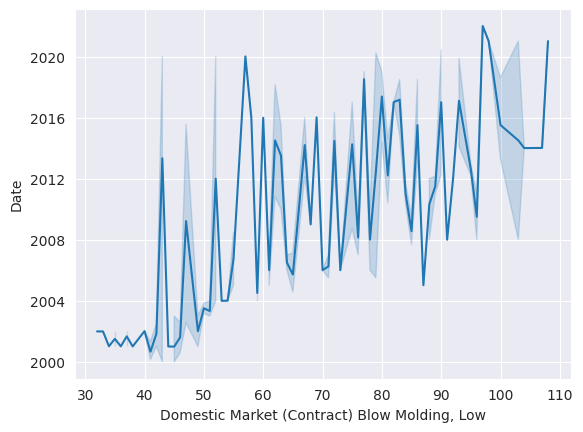

In [ ]:
sns.lineplot(data=df,y='Date',x="Domestic Market (Contract) Blow Molding, Low")

In [ ]:
#sns.lineplot(data=df,x='Year',y="Domestic Market (Contract) Blow Molding, Low")

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(df):
  dftest = adfuller(df, autolag='AIC')
  print("1. ADF : ", dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num of Lags : ", dftest[2])
  print("4. Num of observations used for ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
    print("\t",key, ": ",val)

In [ ]:
ad_test(df['Domestic Market (Contract) Blow Molding, Low'])

1. ADF :  -2.2397167676431793
2. P-Value :  0.19214751697964344
3. Num of Lags :  4
4. Num of observations used for ADF Regression and Critical Values Calculation : 271
5. Critical Values :
	 1% :  -3.4547128138328875
	 5% :  -2.8722649771800155
	 10% :  -2.5724850011573914


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(df['Domestic Market (Contract) Blow Molding, Low'],trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1528.879, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1577.723, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1531.985, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1536.850, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1576.211, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1534.583, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1526.139, Time=1.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1533.679, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1533.519, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1530.104, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1531.870, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1530.878, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1526.049, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1531.897, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  276
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -759.024
Date:                Wed, 03 May 2023   AIC                           1526.049
Time:                        18:15:33   BIC                           1540.516
Sample:                             0   HQIC                          1531.855
                                - 276                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3458      0.047     28.542      0.000       1.253       1.438
ar.L2         -0.4276      0.035    -12.340      0.000      -0.495      -0.360
ma.L1         -0.9514      0.045    -21.259      0.000      -1.039      -0.864
sigma2        14.5934      0.405     36.001      0.000      13.799      15.388
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              5888.45
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                            -3.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(246, 39) (30, 39)


# train the model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Domestic Market (Contract) Blow Molding, Low'],order=(1,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                             
========================================================================================================
Dep. Variable:     Domestic Market (Contract) Blow Molding, Low   No. Observations:                  246
Model:                                           ARIMA(1, 0, 5)   Log Likelihood                -682.563
Date:                                          Wed, 03 May 2023   AIC                           1381.127
Time:                                                  18:19:14   BIC                           1409.170
Sample:                                                       0   HQIC                          1392.418
                                                          - 246                                         
Covariance Type:                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.2649     10.621      6.145      0.000      44.448      86.082
ar.L1          0.9709      0.024     40.941      0.000       0.924       1.017
ma.L1          0.3672      0.045      8.109      0.000       0.278       0.456
ma.L2          0.1208      0.101      1.192      0.233      -0.078       0.319
ma.L3          0.0046      0.089      0.051      0.959      -0.170       0.179
ma.L4         -0.1922      0.090     -2.147      0.032      -0.368      -0.017
ma.L5         -0.1014      0.087     -1.172      0.241      -0.271       0.068
sigma2        14.8348      0.772     19.214      0.000      13.322      16.348
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4306.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                            -2.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

246    47.924210
247    50.105199
248    51.873654
249    51.808565
250    51.742811
251    52.136157
252    52.518061
253    52.888856
254    53.248864
255    53.598400
256    53.937769
257    54.267265
258    54.587177
259    54.897783
260    55.199354
261    55.492152
262    55.776433
263    56.052444
264    56.320427
265    56.580614
266    56.833233
267    57.078503
268    57.316638
269    57.547847
270    57.772329
271    57.990282
272    58.201895
273    58.407352
274    58.606832
275    58.800510
Name: predicted_mean, dtype: float64


In [ ]:
test['Domestic Market (Contract) Blow Molding, Low'].mean()

88.03333333333333

In [ ]:
from math import sqrt

In [ ]:
rmse=sqrt(mean_squared_error(pred,test['Domestic Market (Contract) Blow Molding, Low']))
print(rmse)

35.9168996020668


In [ ]:
model2 = ARIMA(df['Domestic Market (Contract) Blow Molding, Low'],order=(1,0,5))
model2 = model2.fit()
df.tail()

,"Domestic Market (Contract) Blow Molding, Low",IMPCH,EXPCH,WPUFD4111,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,...,United Kingdome_import,China_import,Japan_import,Paper_products,Plastics_bags,Non_packing_plastics,Spot_market,Rubber_products,Crude_oil,Natural_gas
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-08,93,50348,12906,262,329,0,123065609,0,453122670,5476717,...,81872550,0,26097012,142,170,303,0,793,97,12
2022-01-09,90,49247,11953,265,326,0,128225112,0,401790570,2561873,...,74477441,0,21277339,142,170,308,0,786,87,11
2022-01-10,90,44571,15698,268,316,0,129493155,0,403395083,5651870,...,109421098,0,0,140,168,311,0,776,90,9
2022-01-11,90,36876,15576,278,300,0,0,0,0,0,...,0,0,0,137,164,308,0,753,87,9
2022-01-12,90,0,0,0,291,0,0,0,0,0,...,0,0,0,66,164,155,0,137,78,8


# Arima Predictions Domestic Market for next 30 days

In [ ]:
# predictions for next 30 days
index_future_dates = pd.date_range(start='2022-01-12',end='2023-01-01')
pred = model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#pred.index=index_future_dates
print(pred)

276    89.539205
277    88.593581
278    87.811479
279    87.162322
280    86.535847
281    85.934116
282    85.356320
283    84.801506
284    84.268761
285    83.757207
286    83.266000
287    82.794332
288    82.341425
289    81.906533
290    81.488940
291    81.087956
292    80.702923
293    80.333205
294    79.978193
295    79.637302
296    79.309970
297    78.995659
298    78.693850
299    78.404045
300    78.125768
301    77.858560
302    77.601981
303    77.355607
304    77.119033
305    76.891869
306    76.673741
Name: ARIMA Predictions, dtype: float64


# LSTM = Long Short-term memory

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[0.12      , 0.01153021, 0.        , ..., 0.03531599, 0.07758621,
        0.        ],
       [0.12      , 0.0045727 , 0.0085383 , ..., 0.04460967, 0.09482759,
        0.07692308],
       [0.17333333, 0.00107207, 0.03658154, ..., 0.04832714, 0.09482759,
        0.07692308],
       ...,
       [0.14666667, 0.533081  , 0.60841297, ..., 0.7527881 , 0.        ,
        0.        ],
       [0.14666667, 0.65523126, 0.69168103, ..., 0.73048327, 0.09482759,
        0.        ],
       [0.2       , 0.67645386, 0.65596115, ..., 0.74163569, 0.18965517,
        0.        ]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 39
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.12       0.0045727  0.0085383  0.01111111 0.12101911 0.
 0.         0.         0.         0.         0.         0.
 0.04133777 0.02049683 0.40417909 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04576656 0.05297283 0.30728959 0.         0.
 0.         0.         0.         0.         0.4375     0.
 0.04460967 0.09482759 0.07692308 0.17333333 0.00107207 0.03658154
 0.01111111 0.15286624 0.         0.         0.         0.
 0.         0.         0.         0.06294265 0.10549624 0.43142792
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05446237 0.08917336
 0.37782355 0.         0.         0.         0.         0.
 0.         0.44166667 0.         0.04832714 0.09482759 0.07692308
 0.2        0.01520588 0.02851324 0.02222222 0.18471338 0.
 0.         0.         0.         0.         0.         0.
 0.00436656 0.10559845 0.2981105  0.         0.         0.
 0.   

In [ ]:
X.shape

(1, 3, 39)

In [ ]:
# We do the same thing , but now instead for 12 months
n_input = 12
n_features = 39
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100)               56000     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 56,101
Trainable params: 56,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
234/234 [==============================] - 4s 9ms/step - loss: 0.0702 - accuracy: 0.3236
Epoch 2/50
234/234 [==============================] - 3s 11ms/step - loss: 0.0674 - accuracy: 0.3229
Epoch 3/50
234/234 [==============================] - 2s 8ms/step - loss: 0.0668 - accuracy: 0.3228
Epoch 4/50
234/234 [==============================] - 2s 7ms/step - loss: 0.0666 - accuracy: 0.3189
Epoch 5/50
234/234 [==============================] - 2s 7ms/step - loss: 0.0668 - accuracy: 0.3262
Epoch 6/50
234/234 [==============================] - 2s 7ms/step - loss: 0.0668 - accuracy: 0.3213
Epoch 7/50
234/234 [==============================] - 2s 7ms/step - loss: 0.0666 - accuracy: 0.3220
Epoch 8/50
234/234 [==============================] - 3s 11ms/step - loss: 0.0666 - accuracy: 0.3271
Epoch 9/50
234/234 [==============================] - 2s 10ms/step - loss: 0.0666 - accuracy: 0.3243
Epoch 10/50
234/234 [==============================] - 2s 7ms/step - loss: 0.0663 - accuracy: 0.3

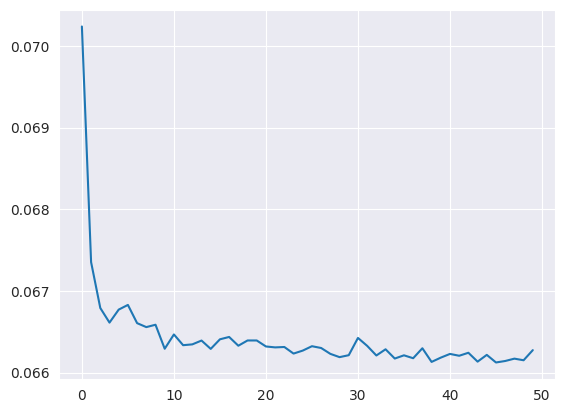

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 22ms/step


array([[0.44500026]], dtype=float32)

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  #current_batch = np.append(current_batch[],[[current_pred]],axis=1)



1/1 [==============================] - 0s 24ms/step


In [ ]:
test_predictions

[array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 array([0.44500026], dtype=float32),
 

# Test Prediction from LSTM 